## Метод кросс-энтропии
Для применения метода кросс-энтропии примем следующие ограничения для рассматриваемого марковского процесса принятия решений
* $S$ - множество состояний *конечное* с размером n $|S|=n$
* $A$ - множество действия *конечное* с размером n $|A|=m$
* $Pfunc$ - функция возвращающая веростность перехода в следующее состояние при выборе определенного действия *детерминированная*
$Pfunc(s^{'}|s, a) = P[S_{t+1} = s^{'}| S_t = s, A_t = a]$
* $Pfunc_0$ - функция инициализации начального (нулевого) состояния *детерминированная*
* $Rfunc$ - функция выдачи награды $Rfunc(s, a) = R_t \iff P[R_t|S_t = s, A_t = a] = 1$ *детерминированная*

С учетом наложенных ограничений на конечность множеств состояний и действий, детерминированность функций перехода и наград все возможные политики можно определить матрицей размерности m на n $\pi(a|s) = \Pi_{a, s}, a \in A, s \in S$

Соответственно задача обучения с подкреплением сводится к задача конечно-мерной оптимизации $\underset{\Pi}{max}f(\Pi)$, где $f(\Pi) = \mathbb{E}_{\pi}[G]$

Но, поскольку матрица $\Pi$ может являться достаточно большой и к тому же функция $f(\Pi)$ представляет собой достаточно сложную зависимость, решение задачи методами конечной оптимизации достаточно проблематично.

Соответственно решать задачу будем методом кросс-энтропии, который состоит из 2-х этапов:
* оценка политики $\mathbb{E}_{\pi}[G]$
* улучшение политики $\pi^{'} \ge \pi(\mathbb{E_{\pi^{'}}}[G] \ge \mathbb{E_{\pi}}[G])$ (если оценка текущей политики выше оценки предыдущей лучшей политики берем ее за лучшую)

### Формула квантиля и перцентиля
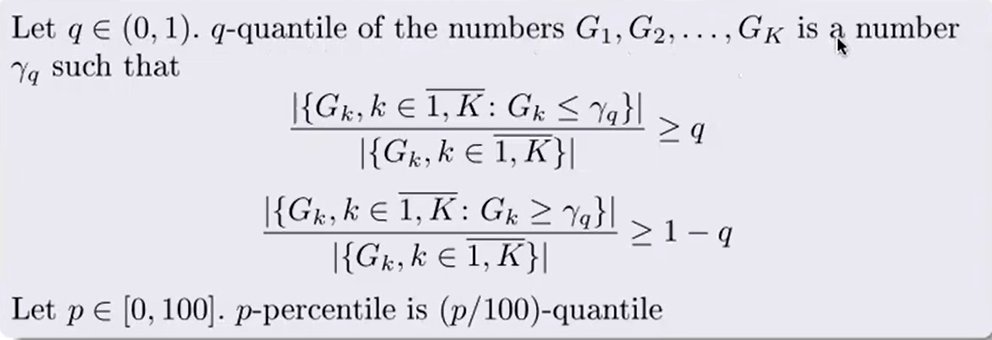

Метод кросс-энтропии будет заключаться в инициализации произвольной (лучше равновероятной) политики $\pi_0$, определении гиперпараметра q (квантиль $q \in (0, 1) $) - параметра отвечающего за выбор количества "элитных траекторий" и выборе числа итераций N.

* (**оценка политики**) Соответственно на этапе оценки семплируем K траекторий с учетом инициализированной политики $\pi_0$ и считаем сумму наград $G(\tau_k)$
$$\mathbb{E}_{\pi}[G] \approx V_{\pi_n} = \frac{1}{K} \sum_{k=1}^K G(\tau_k)$$

* (**улучшение политики**) Выбор "элитных" траекторий, т.е. выбор q-квантиль траекторий ($\tau_n$) и если множество "элитных" траекторий не пустое $\tau_n \neq \emptyset$ обновляем политику $\Pi_{n+1}(a|s) = \frac{\text{количество пар (a|s) в траекториях }\tau_n}{\text{количество s в траекториях }\tau_n}$ т.е. увеличивается вероятность действия a часто встречающегося в "элитных" траекториях.

Проблемы данной реализации улучшения политики:
1) требуется большое количество сессий за счет долгого оценивания и отброса части траекторий
2) выбор политики сильно зависит от случайности (при малом количестве попадании в состояние и выборе одного и того же действия (возможно не оптимального) оно будет выбрано детерминированно как оптимальное)
3) проблема со стохастическими средами (поскольку в данном случае награды будут определяться не только политикой, но и случайным (стохастическим) поведением среды и сложно отделить случайности)
4) пространство состояний и действий конечны

Решение 2-й проблемы:
* сглаживание по Лапласу $\pi_{n+1}(a|s) = \frac{|(a|s) \in \tau_n|+\lambda}{|s \in \tau_n| + \lambda|A|}, \lambda > 0$
* сглаживание политики (при равномерной начальной инициализации) $\pi_{n+1}(a|s) = \lambda\pi_{n+1}(a|s) + (1-\lambda)\pi_{n}(a|s), \lambda \in (0,1]$

Решение 3-й проблемы:

Из стохастической политики $\pi_n$ семплируем m детерминированных политик $\pi_{n, m}$, далее для каждой детерминированной политики семплируем k траекторий, далее считаем оценку детерминированной политики по детерминированным траекториям $V_{\pi_{n, m}} = \frac{1}{K}\sum_{k=1}^K G(\tau_m, k)$. Далее выбираем "элитные" траектории таким же образом, которые больше q-квантиля и продолжаем.